In [1]:
%pip install -e ..

Obtaining file:///home/rstudio/rl4greencrab
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached gymnasium-1.1.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached optuna-4.4.0-py3-none-any.whl.metadata (17 kB)
  Using cached sb3_contrib-2.6.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached typing-3.7.4.3-py3-none-any.whl
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12

In [77]:
import numpy as np
import pandas as pd
from skopt import gp_minimize, gbrt_minimize 
from skopt.plots import plot_convergence, plot_objective
from rl4greencrab.envs.green_crab_monthly_env import greenCrabMonthEnv
from rl4greencrab.envs.green_crab_monthly_env_norm import greenCrabMonthEnvNormalized
from rl4greencrab.envs.green_crab_movingAvg import greenCrabMonthNormalizedMoving
from rl4greencrab import evaluate_agent, multiConstAction, simulator, environment_simulation, plot_selected_sizes
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from huggingface_hub import hf_hub_download
from stable_baselines3 import PPO, TD3
from sb3_contrib import TQC, RecurrentPPO
from LipschitzPPO import LipschitzPPO

## Monthly Environment Simulation

In [2]:
config = {
    "w_mort_scale" : 600,
    "growth_k": 0.70,
    'random_start':True,
    # "curriculum": True
}

In [3]:
def evaluateConstAct(x):
    config = {
        "w_mort_scale" : 600,
        "growth_k": 0.70,
        'random_start':True,
        "curriculum": True
    }
    env = greenCrabMonthEnv(config)
    agent = multiConstAction(env=env, action=np.array(x))
    # rewards = simulator(env, agent).simulate()
    # out = np.mean(rewards)
    m_reward = evaluate_agent(agent=agent, ray_remote=True).evaluate(n_eval_episodes=200)
    
    return - m_reward

In [4]:
%%time
max_action = 3000
res = gp_minimize(evaluateConstAct, 3*[(0.0, max_action)], n_calls = 100, verbose=True)
res.x

Iteration No: 1 started. Evaluating function at random point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(
2025-06-21 04:44:03,507	INFO worker.py:1917 -- Started a local Ray instance.


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 19.2097
Function value obtained: 7.1927
Current minimum: 7.1927
Iteration No: 2 started. Evaluating function at random point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.3791
Function value obtained: 13.1632
Current minimum: 7.1927
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.3902
Function value obtained: 33.5008
Current minimum: 7.1927
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.3888
Function value obtained: 16.5777
Current minimum: 7.1927
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.3841
Function value obtained: 38.3841
Current minimum: 7.1927
Iteration No: 6 started. Evaluating function at random point.
Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.3836
Function value obtained: 48.3455
Current minimum: 7.1927
Iteration No: 7 started. Evaluating function at random point.
Iteration No: 7 ended. Evaluat

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 0.5643
Function value obtained: 21.0308
Current minimum: 7.1927
Iteration No: 12 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 0.5789
Function value obtained: 6.7891
Current minimum: 6.7891
Iteration No: 13 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 0.6523
Function value obtained: 6.6572
Current minimum: 6.6572
Iteration No: 14 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.6011
Function value obtained: 6.8073
Current minimum: 6.6572
Iteration No: 15 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.5551
Function value obtained: 6.5582
Current minimum: 6.5582
Iteration No: 16 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.8189
Function value obtained: 9.3469
Current minimum: 6.5582
Iteration No: 17 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 0.6505
Function value obtained: 6.4190
Current minimum: 6.4190
Iteration No: 18 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.6057
Function value obtained: 6.4541
Current minimum: 6.4190
Iteration No: 19 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.6321
Function value obtained: 11.5735
Current minimum: 6.4190
Iteration No: 20 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.6505
Function value obtained: 6.3449
Current minimum: 6.3449
Iteration No: 21 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.5150
Function value obtained: 6.4981
Current minimum: 6.3449
Iteration No: 22 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.5414
Function value obtained: 8.9417
Current minimum: 6.3449
Iteration No: 23 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.6057
Function value obtained: 16.4820
Current minimum: 6.3449
Iteration No: 24 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.6147
Function value obtained: 7.8299
Current minimum: 6.3449
Iteration No: 25 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 0.6737
Function value obtained: 6.5753
Current minimum: 6.3449
Iteration No: 26 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 0.6088
Function value obtained: 6.8604
Current minimum: 6.3449
Iteration No: 27 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 0.6263
Function value obtained: 9.5603
Current minimum: 6.3449
Iteration No: 28 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.6703
Function value obtained: 9.9135
Current minimum: 6.3449
Iteration No: 29 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 0.6717
Function value obtained: 6.5312
Current minimum: 6.3449
Iteration No: 30 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 0.7446
Function value obtained: 6.7334
Current minimum: 6.3449
Iteration No: 31 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 0.7522
Function value obtained: 6.4002
Current minimum: 6.3449
Iteration No: 32 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 0.7516
Function value obtained: 6.3806
Current minimum: 6.3449
Iteration No: 33 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.7660
Function value obtained: 6.5700
Current minimum: 6.3449
Iteration No: 34 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 0.8474
Function value obtained: 6.5043
Current minimum: 6.3449
Iteration No: 35 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.7487
Function value obtained: 6.7494
Current minimum: 6.3449
Iteration No: 36 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 0.7166
Function value obtained: 6.7991
Current minimum: 6.3449
Iteration No: 37 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 0.7264
Function value obtained: 6.5141
Current minimum: 6.3449
Iteration No: 38 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 0.7066
Function value obtained: 6.8185
Current minimum: 6.3449
Iteration No: 39 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 0.7018
Function value obtained: 7.7504
Current minimum: 6.3449
Iteration No: 40 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 0.7174
Function value obtained: 6.6559
Current minimum: 6.3449
Iteration No: 41 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.6985
Function value obtained: 6.9318
Current minimum: 6.3449
Iteration No: 42 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.7286
Function value obtained: 7.4967
Current minimum: 6.3449
Iteration No: 43 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.7898
Function value obtained: 6.5312
Current minimum: 6.3449
Iteration No: 44 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.7239
Function value obtained: 6.3074
Current minimum: 6.3074
Iteration No: 45 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.7918
Function value obtained: 6.3259
Current minimum: 6.3074
Iteration No: 46 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 0.8567
Function value obtained: 6.2815
Current minimum: 6.2815
Iteration No: 47 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 0.9344
Function value obtained: 6.3222
Current minimum: 6.2815
Iteration No: 48 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 0.9474
Function value obtained: 6.5140
Current minimum: 6.2815
Iteration No: 49 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 0.9213
Function value obtained: 6.5727
Current minimum: 6.2815
Iteration No: 50 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 0.8780
Function value obtained: 6.4600
Current minimum: 6.2815
Iteration No: 51 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 51 ended. Search finished for the next optimal point.
Time taken: 0.9944
Function value obtained: 12.3313
Current minimum: 6.2815
Iteration No: 52 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 52 ended. Search finished for the next optimal point.
Time taken: 0.9152
Function value obtained: 6.7178
Current minimum: 6.2815
Iteration No: 53 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 53 ended. Search finished for the next optimal point.
Time taken: 1.0371
Function value obtained: 6.6227
Current minimum: 6.2815
Iteration No: 54 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 54 ended. Search finished for the next optimal point.
Time taken: 0.9350
Function value obtained: 6.8540
Current minimum: 6.2815
Iteration No: 55 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 55 ended. Search finished for the next optimal point.
Time taken: 0.8641
Function value obtained: 6.2260
Current minimum: 6.2260
Iteration No: 56 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 56 ended. Search finished for the next optimal point.
Time taken: 0.9184
Function value obtained: 6.1814
Current minimum: 6.1814
Iteration No: 57 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 57 ended. Search finished for the next optimal point.
Time taken: 1.0566
Function value obtained: 6.5802
Current minimum: 6.1814
Iteration No: 58 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 58 ended. Search finished for the next optimal point.
Time taken: 1.0145
Function value obtained: 6.2552
Current minimum: 6.1814
Iteration No: 59 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 59 ended. Search finished for the next optimal point.
Time taken: 0.9353
Function value obtained: 9.5018
Current minimum: 6.1814
Iteration No: 60 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 60 ended. Search finished for the next optimal point.
Time taken: 0.8871
Function value obtained: 6.3696
Current minimum: 6.1814
Iteration No: 61 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 61 ended. Search finished for the next optimal point.
Time taken: 0.9439
Function value obtained: 6.3207
Current minimum: 6.1814
Iteration No: 62 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 62 ended. Search finished for the next optimal point.
Time taken: 0.9803
Function value obtained: 6.3726
Current minimum: 6.1814
Iteration No: 63 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 63 ended. Search finished for the next optimal point.
Time taken: 0.8716
Function value obtained: 6.6584
Current minimum: 6.1814
Iteration No: 64 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 64 ended. Search finished for the next optimal point.
Time taken: 0.9238
Function value obtained: 6.3789
Current minimum: 6.1814
Iteration No: 65 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 65 ended. Search finished for the next optimal point.
Time taken: 0.9112
Function value obtained: 12.3904
Current minimum: 6.1814
Iteration No: 66 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 66 ended. Search finished for the next optimal point.
Time taken: 0.8947
Function value obtained: 6.2057
Current minimum: 6.1814
Iteration No: 67 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 67 ended. Search finished for the next optimal point.
Time taken: 0.9934
Function value obtained: 6.4498
Current minimum: 6.1814
Iteration No: 68 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 68 ended. Search finished for the next optimal point.
Time taken: 1.0228
Function value obtained: 6.4158
Current minimum: 6.1814
Iteration No: 69 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 69 ended. Search finished for the next optimal point.
Time taken: 1.0080
Function value obtained: 6.5376
Current minimum: 6.1814
Iteration No: 70 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 70 ended. Search finished for the next optimal point.
Time taken: 1.0166
Function value obtained: 6.2373
Current minimum: 6.1814
Iteration No: 71 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 71 ended. Search finished for the next optimal point.
Time taken: 1.1049
Function value obtained: 6.4519
Current minimum: 6.1814
Iteration No: 72 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 72 ended. Search finished for the next optimal point.
Time taken: 0.9839
Function value obtained: 7.9078
Current minimum: 6.1814
Iteration No: 73 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 73 ended. Search finished for the next optimal point.
Time taken: 1.0364
Function value obtained: 6.5269
Current minimum: 6.1814
Iteration No: 74 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 74 ended. Search finished for the next optimal point.
Time taken: 1.0728
Function value obtained: 6.2489
Current minimum: 6.1814
Iteration No: 75 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 75 ended. Search finished for the next optimal point.
Time taken: 0.9593
Function value obtained: 6.2717
Current minimum: 6.1814
Iteration No: 76 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 76 ended. Search finished for the next optimal point.
Time taken: 1.1698
Function value obtained: 9.9201
Current minimum: 6.1814
Iteration No: 77 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 77 ended. Search finished for the next optimal point.
Time taken: 1.1292
Function value obtained: 6.3433
Current minimum: 6.1814
Iteration No: 78 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 78 ended. Search finished for the next optimal point.
Time taken: 1.0616
Function value obtained: 6.4973
Current minimum: 6.1814
Iteration No: 79 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 79 ended. Search finished for the next optimal point.
Time taken: 0.9935
Function value obtained: 6.4190
Current minimum: 6.1814
Iteration No: 80 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 80 ended. Search finished for the next optimal point.
Time taken: 1.0547
Function value obtained: 8.7413
Current minimum: 6.1814
Iteration No: 81 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 1.0825
Function value obtained: 6.3715
Current minimum: 6.1814
Iteration No: 82 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 1.1091
Function value obtained: 6.3200
Current minimum: 6.1814
Iteration No: 83 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 1.1119
Function value obtained: 6.7228
Current minimum: 6.1814
Iteration No: 84 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 1.1083
Function value obtained: 6.4256
Current minimum: 6.1814
Iteration No: 85 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 1.1190
Function value obtained: 6.4597
Current minimum: 6.1814
Iteration No: 86 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 86 ended. Search finished for the next optimal point.
Time taken: 1.0819
Function value obtained: 6.6617
Current minimum: 6.1814
Iteration No: 87 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 87 ended. Search finished for the next optimal point.
Time taken: 1.0779
Function value obtained: 6.3720
Current minimum: 6.1814
Iteration No: 88 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 88 ended. Search finished for the next optimal point.
Time taken: 1.0987
Function value obtained: 6.3388
Current minimum: 6.1814
Iteration No: 89 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 89 ended. Search finished for the next optimal point.
Time taken: 1.2122
Function value obtained: 6.3955
Current minimum: 6.1814
Iteration No: 90 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 90 ended. Search finished for the next optimal point.
Time taken: 1.3199
Function value obtained: 6.4678
Current minimum: 6.1814
Iteration No: 91 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 91 ended. Search finished for the next optimal point.
Time taken: 1.3750
Function value obtained: 6.2524
Current minimum: 6.1814
Iteration No: 92 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 92 ended. Search finished for the next optimal point.
Time taken: 1.2893
Function value obtained: 6.3117
Current minimum: 6.1814
Iteration No: 93 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 93 ended. Search finished for the next optimal point.
Time taken: 1.3484
Function value obtained: 6.2082
Current minimum: 6.1814
Iteration No: 94 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 94 ended. Search finished for the next optimal point.
Time taken: 1.3912
Function value obtained: 6.4072
Current minimum: 6.1814
Iteration No: 95 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 95 ended. Search finished for the next optimal point.
Time taken: 1.4103
Function value obtained: 6.2059
Current minimum: 6.1814
Iteration No: 96 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 96 ended. Search finished for the next optimal point.
Time taken: 1.3852
Function value obtained: 6.3034
Current minimum: 6.1814
Iteration No: 97 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 1.4291
Function value obtained: 6.2968
Current minimum: 6.1814
Iteration No: 98 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 1.4213
Function value obtained: 6.3014
Current minimum: 6.1814
Iteration No: 99 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 99 ended. Search finished for the next optimal point.
Time taken: 1.3442
Function value obtained: 6.4291
Current minimum: 6.1814
Iteration No: 100 started. Searching for the next optimal point.


/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Iteration No: 100 ended. Search finished for the next optimal point.
Time taken: 1.4610
Function value obtained: 6.4475
Current minimum: 6.1814
CPU times: user 50min 5s, sys: 9.76 s, total: 50min 15s
Wall time: 1min 45s


[234.1763524346601, 943.2079115173758, 0.0]

In [4]:
# with nonNormalized env
evaluateConstAct(
    [234.1763524346601, 943.2079115173758, 0.0]
)

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(
2025-06-21 05:16:20,188	INFO worker.py:1917 -- Started a local Ray instance.


6.300109327542129

In [5]:
import ray
ray.shutdown()

In [6]:
env = greenCrabMonthEnv(config)
agent = multiConstAction(env=env, action=np.array([234.1763524346601, 943.2079115173758, 0.0]))
constantData = simulator(env = env, agent = agent).simulate_full_named_dict_obs_acts()
constantDataDF = pd.DataFrame(constantData)
constantDataDF.head()

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


,t,obs0,obs1,act0,act1,act2,rew,rep
0,0,0.0,0.0,234.176352,943.207912,0.0,0.000000,0
1,1,0.0,0.0,234.176352,943.207912,0.0,-0.031458,0
2,2,0.0,0.0,234.176352,943.207912,0.0,-0.062916,0
3,3,0.0,0.0,234.176352,943.207912,0.0,-0.094375,0
4,4,0.0,0.0,234.176352,943.207912,0.0,-0.125833,0


<Axes: xlabel='t'>

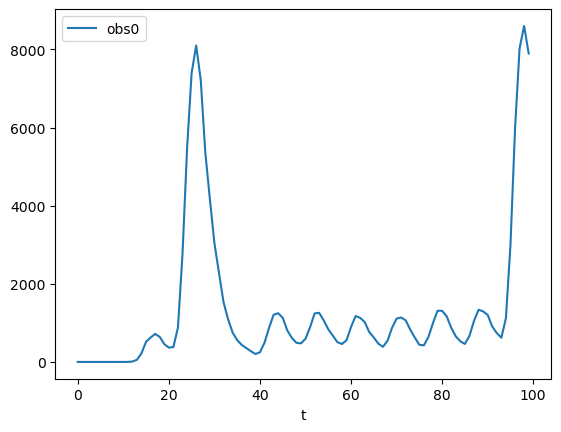

In [7]:
constantDataDF[constantDataDF.rep == 0].plot(x='t', y =['obs0'])

In [8]:
agent = multiConstAction(env=env, action=np.array([0.0, 0, 0.0]))
constantData = environment_simulation(env, agent)
constantDataDF = pd.DataFrame(constantData)
constantDataDF.head()

,t,obs0,obs1,act0,act1,act2,rew,rep,crab_pop
0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,"[0.0002598560294824107, 0.004307844136430026, ..."
1,1,0.0,0.0,0.0,0.0,0.0,-0.258254,0,"[3.388442265121167e-12, 7.029325152444069e-07,..."
2,2,0.0,0.0,0.0,0.0,0.0,-0.522083,0,"[4.4845403811843764e-18, 3.763792122035883e-11..."
3,3,0.0,0.0,0.0,0.0,0.0,-0.786873,0,"[8.969081115005298e-19, 7.52759654217566e-12, ..."
4,4,0.0,0.0,0.0,0.0,0.0,-1.051833,0,"[3.5263654548988596e-26, 1.2298103500697757e-1..."


In [9]:
crab_pop_df = pd.DataFrame(constantDataDF[constantDataDF['rep']==0]['crab_pop'].tolist(), columns=[f'crab_pop_{i}' for i in range(len(constantDataDF['crab_pop'][0]))])
crab_pop_df['t'] = constantDataDF['t']
crab_pop_df.head()

,crab_pop_0,crab_pop_1,crab_pop_2,crab_pop_3,crab_pop_4,crab_pop_5,crab_pop_6,crab_pop_7,crab_pop_8,crab_pop_9,...,crab_pop_12,crab_pop_13,crab_pop_14,crab_pop_15,crab_pop_16,crab_pop_17,crab_pop_18,crab_pop_19,crab_pop_20,t
0,2.598560e-04,4.307844e-03,4.921121e-02,0.387660,2.107241,7.908961,20.506623,36.746259,45.518556,38.981839,...,2.669452,0.521091,0.070198,0.006522,0.000418,0.000018,5.587596e-07,1.166134e-08,1.672906e-10,0
1,3.388442e-12,7.029325e-07,3.095431e-03,0.424451,10.526237,116.367106,683.975693,2197.779767,4003.938659,4450.219581,...,515.216841,130.342672,45.400893,23.189408,10.628582,3.525707,5.646722e-01,8.657805e-03,3.727925e-06,1
2,4.484540e-18,3.763792e-11,6.259693e-06,0.022169,2.323185,35.956845,265.711810,1115.187543,2754.142060,4151.070677,...,1120.703374,334.471146,86.826430,32.381663,13.494420,4.522775,8.320258e-01,1.297871e-02,5.591796e-06,2
3,8.969081e-19,7.527597e-12,1.252021e-06,0.004445,0.496158,10.029920,96.968886,519.679299,1652.998861,3258.798255,...,1923.329043,737.305200,206.867286,55.752558,19.542204,6.720702,1.123335e+00,1.731241e-02,7.455814e-06,3
4,3.526365e-26,1.229810e-17,8.256767e-11,0.000011,0.031458,2.693294,34.230088,227.643641,903.938509,2242.889487,...,2735.370151,1329.919834,454.490004,118.830345,32.491409,10.101468,2.348487e+00,2.527383e-01,3.088216e-03,4


In [10]:
# Create a multi-select widget for crab size columns
crab_pop_columns = [col for col in crab_pop_df.columns if col.startswith('crab_pop_')]
size_selector = widgets.SelectMultiple(
    options=crab_pop_columns,
    value=[crab_pop_columns[0]],  # Default selection
    description='Sizes',
    disabled=False
)
# Create an interactive plot
interact(lambda selected_sizes: plot_selected_sizes(crab_pop_df, selected_sizes), selected_sizes=size_selector);

interactive(children=(SelectMultiple(description='Sizes', index=(0,), options=('crab_pop_0', 'crab_pop_1', 'cr…

### normalized environment

In [11]:
config = {
    "w_mort_scale" : 600,
    "growth_k": 0.70,
    'random_start':True,
    # "curriculum": True
}

In [12]:
env = greenCrabMonthEnvNormalized(config)

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [13]:
def evaluateConstAct(x):
    env = greenCrabMonthEnvNormalized(config)
    agent = multiConstAction(env=env, action=np.array(x))
    # rewards = simulator(env, agent).simulate()
    # out = np.mean(rewards)
    rewards = evaluate_agent(agent=agent, ray_remote=True).evaluate(n_eval_episodes=200, return_episode_rewards=True)
    m_reward = np.mean(rewards)
    return -m_reward, rewards

In [14]:
# normalized constant action
def normalized_action(act, max_act):
    max_action = max_act
    constant_act = np.array(act)
    return constant_act * 2 / max_action - 1 

In [15]:
norm_act = normalized_action([234.1763524346601, 943.2079115173758, 0.0], 3000)
m_reward, const_rews = evaluateConstAct(norm_act)
np.mean(const_rews)

2025-06-21 05:16:37,250	INFO worker.py:1917 -- Started a local Ray instance.


-6.483442495324676

In [16]:
import ray
ray.shutdown()

In [17]:
agent = multiConstAction(env=env, action=np.array(norm_act))

In [18]:
constantData = simulator(env = env, agent = agent).simulate_full_named_dict_obs_acts()
constantDataDF = pd.DataFrame(constantData)
constantDataDF.head()

,t,obs0,obs1,act0,act1,act2,rew,rep
0,0,-1.0,-1.0,-0.843882,-0.371195,-1.0,0.000000,0
1,1,-1.0,-1.0,-0.843882,-0.371195,-1.0,-0.031458,0
2,2,-1.0,-1.0,-0.843882,-0.371195,-1.0,-0.062916,0
3,3,-1.0,-1.0,-0.843882,-0.371195,-1.0,-0.094375,0
4,4,-1.0,-1.0,-0.843882,-0.371195,-1.0,-0.125833,0


<Axes: xlabel='t'>

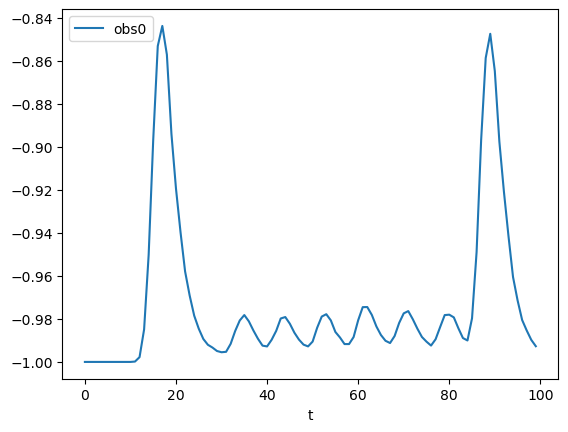

In [19]:
constantDataDF[constantDataDF.rep == 0].plot(x='t', y =['obs0'])

## Loading and evaluating trained models

In [52]:
repo_id = "jimjiang203/greencrabPPO"
td3_path = hf_hub_download(repo_id=repo_id, filename='td3_gcmonthnorm.zip')
ppo_path = hf_hub_download(repo_id=repo_id, filename='PPO_gcmenorm.zip')
reppo_path = hf_hub_download(repo_id=repo_id, filename='RecurrentPPO_gcmenorm.zip')
tqc_path = hf_hub_download(repo_id=repo_id, filename='TQC_gcmenorm.zip')

In [198]:
evalEnv =  greenCrabMonthEnvNormalized(config)

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [201]:
path = "../saved_agents"
#td3Agent = TD3.load(f"TD3_gcmemoving", device="cpu")
ppoAgent = PPO.load(f"PPO_gcmenorm_0", device="cpu")
# tqcAgent = TQC.load(f"TQC_gcmemoving", device="cpu")
recurrentPPOAgent = RecurrentPPO.load("RecurrentPPO_gcmenorm_256_1_{'pi': [256, 256], 'vf': [256, 256]}_False", device="cpu")
lppoAgent = LipschitzPPO.load("LipschitzPPO_gcmemoving_0.1_0.5", device="cpu")

In [206]:
N_EPS = 30

ppo_rew = evaluate_agent(agent=ppoAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS)
td3_rew = evaluate_agent(agent=td3Agent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS)
tqc_rew = evaluate_agent(agent=tqcAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS)
reppo_rew = evaluate_agent(agent=recurrentPPOAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS)
lppo_rew = evaluate_agent(agent=lppoAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS)

2025-06-28 02:59:25,251	INFO worker.py:1917 -- Started a local Ray instance.


In [207]:
N_EPS = 200

ppo_rews = evaluate_agent(agent=ppoAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS, return_episode_rewards=True)
td3_rews = evaluate_agent(agent=td3Agent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS, return_episode_rewards=True)
tqc_rews = evaluate_agent(agent=tqcAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS, return_episode_rewards=True)
reppo_rews = evaluate_agent(agent=recurrentPPOAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS, return_episode_rewards=True)
lppo_rews = evaluate_agent(agent=lppoAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS, return_episode_rewards=True)

In [208]:
import ray
ray.shutdown()

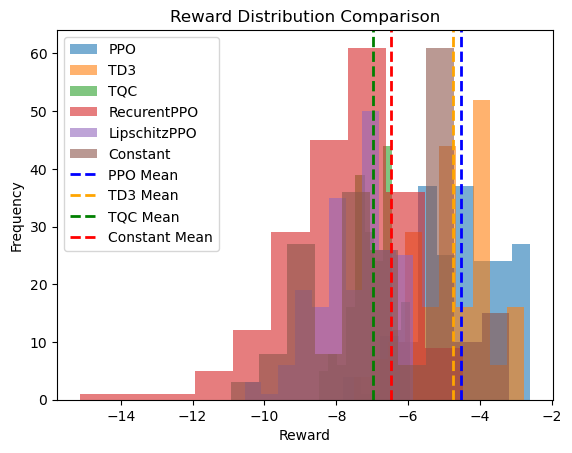

In [209]:
plt.hist(ppo_rews, alpha=0.6, label='PPO')
plt.hist(td3_rews, alpha=0.6, label='TD3')
plt.hist(tqc_rews, alpha=0.6, label='TQC')
plt.hist(reppo_rews , alpha=0.6, label='RecurentPPO')
plt.hist(lppo_rews , alpha=0.6, label='LipschitzPPO')
plt.hist(const_rews, alpha=0.6, label='Constant')

# # Mark means with vertical lines
plt.axvline(np.mean(ppo_rews), color='blue', linestyle='dashed', linewidth=2, label='PPO Mean')
plt.axvline(np.mean(td3_rews), color='orange', linestyle='dashed', linewidth=2, label='TD3 Mean')
plt.axvline(np.mean(tqc_rews), color='green', linestyle='dashed', linewidth=2, label='TQC Mean')
plt.axvline(np.mean(const_rews), color='red', linestyle='dashed', linewidth=2, label='Constant Mean')

plt.legend()
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.title("Reward Distribution Comparison")
plt.show()

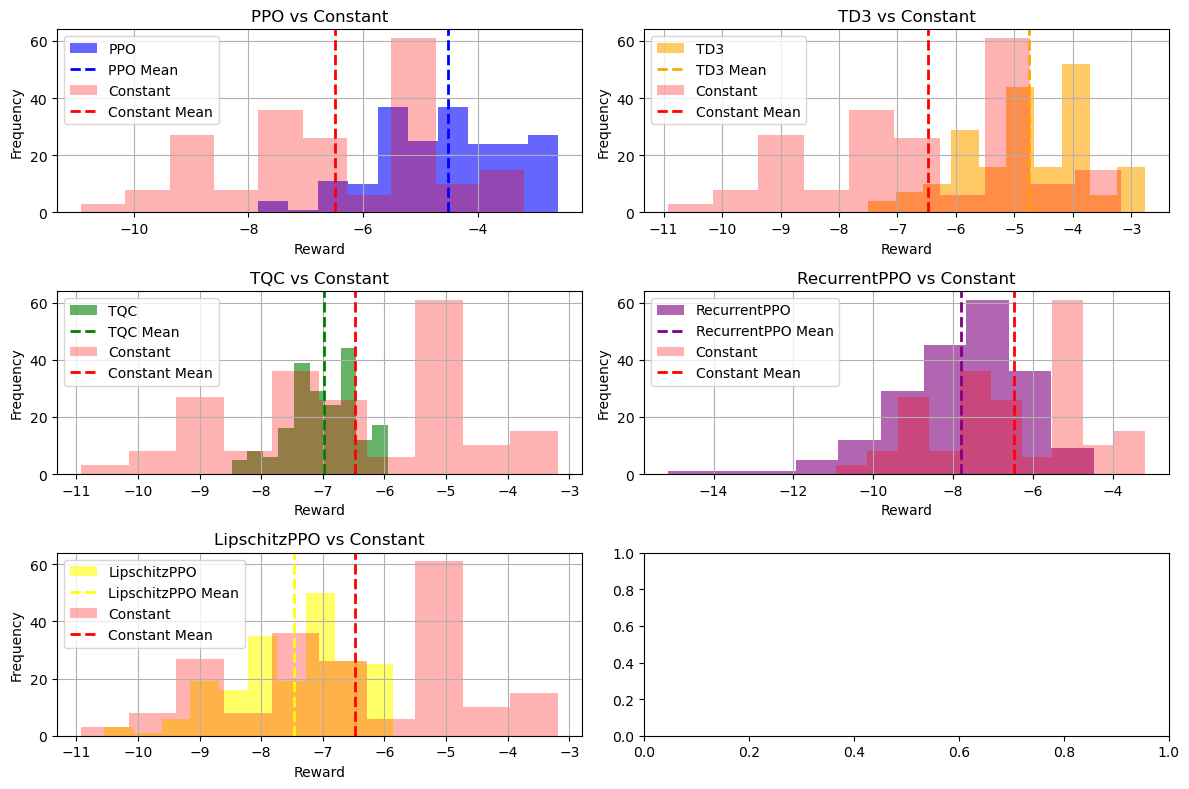

In [210]:
models = {
    'PPO': ppo_rews,
    'TD3': td3_rews,
    'TQC': tqc_rews,
    'RecurrentPPO': reppo_rews,
    'LipschitzPPO': lppo_rews
}
constant_rewards = const_rews

colors = {
    'PPO': 'blue',
    'TD3': 'orange',
    'TQC': 'green',
    'RecurrentPPO': 'purple',
    'LipschitzPPO': 'yellow',
    'Constant': 'red'
}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, (model_name, rewards) in enumerate(models.items()):
    ax = axes[i]
    # Plot current model
    ax.hist(rewards, alpha=0.6, color=colors[model_name], label=model_name)
    ax.axvline(np.mean(rewards), color=colors[model_name], linestyle='dashed', linewidth=2, label=f'{model_name} Mean')

    # Plot constant model
    ax.hist(constant_rewards, alpha=0.3, color=colors['Constant'], label='Constant')
    ax.axvline(np.mean(constant_rewards), color=colors['Constant'], linestyle='dashed', linewidth=2, label='Constant Mean')

    ax.set_title(f"{model_name} vs Constant")
    ax.set_xlabel("Reward")
    ax.set_ylabel("Frequency")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [211]:
np.std(ppo_rews), np.std(td3_rews), np.std(tqc_rews), np.std(reppo_rews)

(1.180772573131701, 1.0757263034290885, 0.5730831637209762, 1.588192094655999)

In [212]:
np.mean(ppo_rews), np.mean(td3_rews), np.mean(tqc_rews), np.mean(reppo_rews), np.mean(lppo_rew)

(-4.523005975413819,
 -4.75592139674759,
 -6.984706941254688,
 -7.788354326285068,
 -7.300591331360639)

In [150]:
print(f"""
PPO mean rew = {ppo_rew}
TQC mean rew = {tqc_rew}
TD3 mean rew = {td3_rew}
RecurrentPPO mean rew = {reppo_rew}
LipschitzPPO mean rew = {lppo_rew}
""")


PPO mean rew = -5.760916770918344
TQC mean rew = -9.047067300795222
TD3 mean rew = -5.860920372921737
RecurrentPPO mean rew = -7.749452310276779
LipschitzPPO mean rew = -7.93536753949572



### RL action plots

In [181]:
evalEnv =  greenCrabMonthEnvNormalized(config)

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [170]:
lppo_rew = evaluate_agent(agent=ppoAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS)

2025-06-26 19:21:45,894	INFO worker.py:1917 -- Started a local Ray instance.


In [171]:
import ray
ray.shutdown()

In [176]:
lppo_rew

-5.492446558696904

In [188]:
ppoAgent = PPO.load(f"PPO_gcmenorm_0", device="cpu")

In [189]:
ppoData = simulator(env = evalEnv, agent = ppoAgent).simulate_full_named_dict_obs_acts()
ppoDataDF = pd.DataFrame(ppoData)
ppoDataDF.head(12)

,t,obs0,obs1,act0,act1,act2,rew,rep
0,0,-1.000000,-1.000000,-0.847923,-0.785029,-1.0,0.000000,0
1,1,-0.991936,-0.049068,-1.000000,-1.000000,-1.0,-0.015145,0
2,2,-1.000000,-1.000000,-0.256207,-0.645503,-1.0,-0.016207,0
3,3,-0.983854,-0.112750,-0.400603,-0.943157,-1.0,-0.061568,0
4,4,-0.974400,0.034184,-0.095539,-0.885252,-1.0,-0.089892,0
5,5,-0.970775,-0.347419,-0.361047,-0.987354,-1.0,-0.132295,0
6,6,-0.973951,0.067398,-0.919294,-1.000000,-1.0,-0.159965,0
7,7,-0.975384,8.070525,-0.694602,-1.000000,-1.0,-0.236418,0
8,8,-0.982580,1.625734,-0.828936,-0.460555,-1.0,-0.249623,0
9,9,-0.985794,0.519867,-0.754187,-0.825910,-1.0,-0.278821,0


<Axes: xlabel='t'>

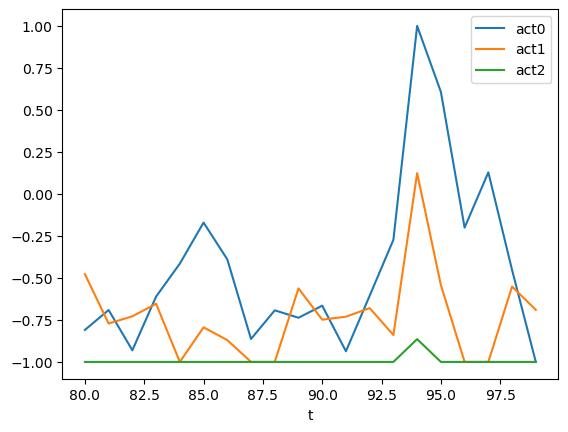

In [197]:
ppoDataDF[ppoDataDF.rep == 0].loc[80:, :].plot(x='t', y =['act0', 'act1', 'act2'])

<Axes: xlabel='t'>

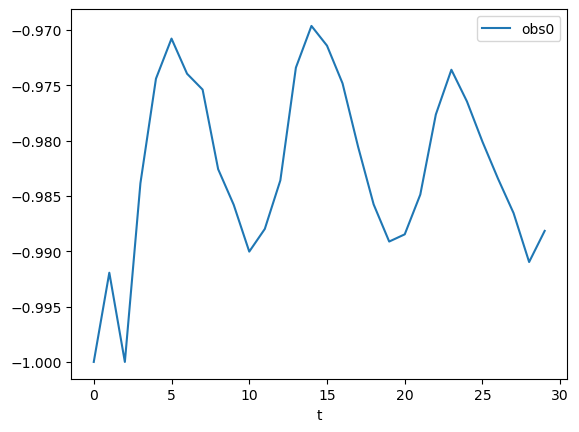

In [191]:
ppoDataDF[ppoDataDF.rep == 0].head(30).plot(x='t', y =['obs0'])

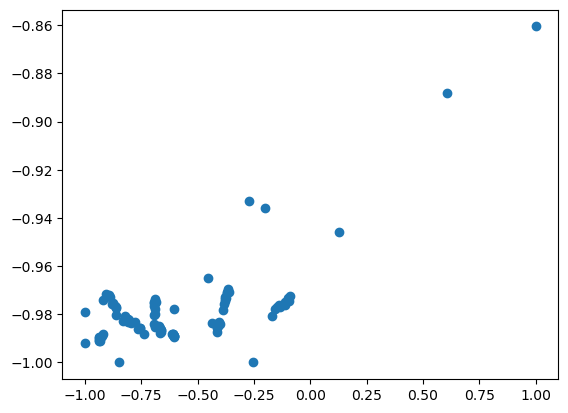

In [193]:
plt.scatter(x=ppoDataDF[ppoDataDF.rep == 0]['act0'], y =ppoDataDF[ppoDataDF.rep == 0]['obs0'])

In [213]:
ppoData = simulator(env = evalEnv, agent = lppoAgent).simulate_full_named_dict_obs_acts()
ppoDataDF = pd.DataFrame(ppoData)
ppoDataDF.head()

,t,obs0,obs1,act0,act1,act2,rew,rep
0,0,-1.0,-1.0,-0.369732,-0.139582,-1.0,0.000000,0
1,1,-1.0,-1.0,-0.393677,-0.147579,-1.0,-0.059689,0
2,2,-1.0,-1.0,-0.387808,-0.144999,-1.0,-0.118100,0
3,3,-1.0,-1.0,-0.404405,-0.144547,-1.0,-0.176849,0
4,4,-1.0,-1.0,-0.402586,-0.139751,-1.0,-0.234952,0


<Axes: xlabel='t'>

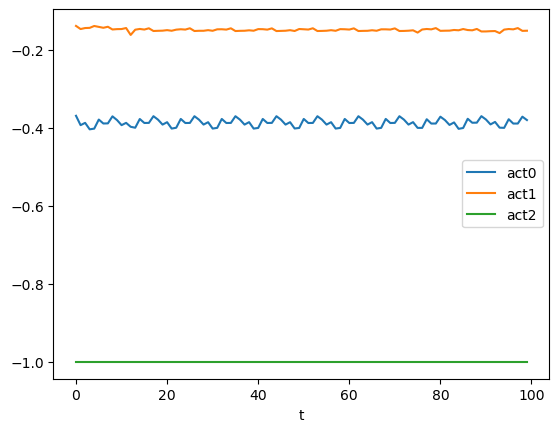

In [216]:
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['act0', 'act1', 'act2'])

<Axes: xlabel='t'>

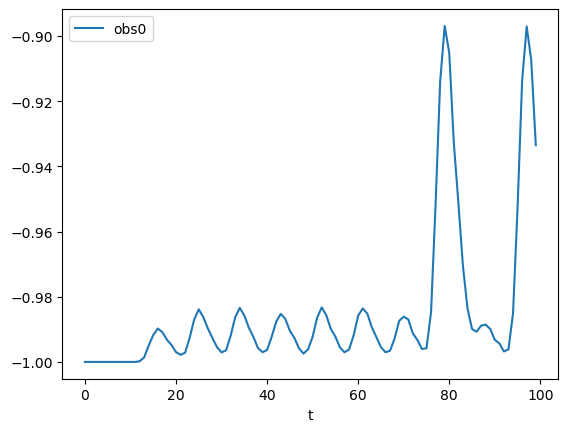

In [217]:
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['obs0'])

## Special Section: Testing ensemble PPO

In [9]:
from ensemble_ppo import *

In [56]:
eppoAgent = EnsemblePPO.load('ensemblePPO_gcmenorm')

Loading ensemblePPO_gcmenorm/model_1.zip …


In [57]:
obs = {
    "crabs": np.array([1, 1]),
    "months" : 4 
}
eppoAgent.predict(obs)

(array([-0.03874406,  0.3987172 ,  1.        ], dtype=float32), None)

In [58]:
N_EPS = 30
eppo_rews = evaluate_agent(agent=eppoAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS, return_episode_rewards=True)

2025-06-16 18:37:01,363	INFO worker.py:1888 -- Started a local Ray instance.


In [59]:
import ray
ray.shutdown()

In [60]:
np.mean(eppo_rews)

-2.4034102689903323

In [61]:
ppoData = simulator(env = evalEnv, agent = eppoAgent).simulate_full_named_dict_obs_acts()
ppoDataDF = pd.DataFrame(ppoData)
ppoDataDF.head()

,t,obs0,obs1,act0,act1,act2,rew,rep
0,0,-1.000000,-1.000000,-0.974713,-0.849815,-1.0,0.000000,0
1,1,-0.979864,0.376640,-1.000000,1.000000,-1.0,-0.011415,0
2,2,-0.979767,-0.416228,-0.637097,-0.391289,-1.0,-0.092169,0
3,3,-0.983821,-0.119736,-1.000000,-1.000000,-1.0,-0.131576,0
4,4,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.132317,0


<Axes: xlabel='t'>

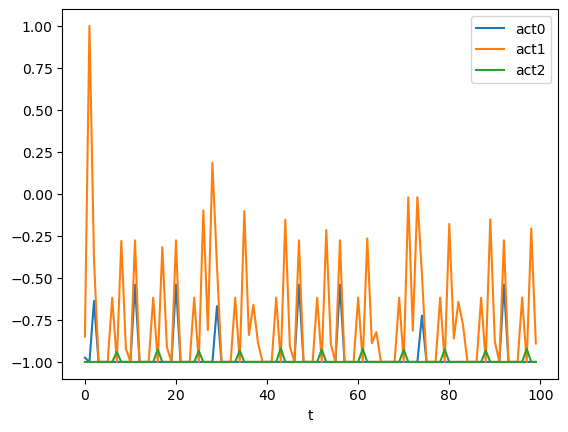

In [62]:
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['act0', 'act1', 'act2'])